## Connectomics
- A graph theory approach to examining brain data
- We live in an age of BIG DATA
- For example, lets look at a website called Neurosynth
- https://neurosynth.org/locations/30_-18_-18_6/

<img src='Images/NeuroSynthHip.png' style='width:250px'>

While largescale of analysis like neurosynth are handy, it is also indicitive of some of the difficulties of fMRI studies. (Cluster overlap)

What if instead we had a set of units that split the brain into meaningful, distinct segments?

<div>
<img src='Images/Parcel.png' width='400'/>
<div/>

Parcellations can come in many forms and apply different data to split the brain into regions. The Yeo parcellation is based on the normative resting state functional connectivity data of 1000 young adults. Voxels are split into physically contigious regions with high functional connectivity.

From here we can turn the parcellation into a graph with each parcel representing one node.

In short: Voxels are grouped to make parcels and each parcel is treated as a node.

Parcels are determined by their membership to functional networks. In the above image we can see some parcels share colors. These colors indicate what functional network they belong to.

<div>
<img src='Images/BlankNet.png' width='400'/>
<div/>

In this form we can apply graph theory methods to analyze resting state functional connectivity or other brain metrics.

# Degree

The first metric we can measure is degree. Degree is the number of connections a node maintains. What is the degree of the blue node in the two images below?
## 1

<div>
<img src='Images/Deg1.png' width='300'/>
<div/>

    
    
    
## 2    
    
<div>
<img src='Images/Deg4.png' width='300'/>
<div/>

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bct

In [4]:
SampleData = np.array([[1,.9,-.4,-.5,.3,.2],\
              [.9,1,-.5,-.4,.2,.3],\
              [-.4,-.5,1,.9,.5,.4],\
              [-.5,-.4,.9,1,.4,.5],\
              [.3,.2,.4,.5,1,.9],\
              [.2,.3,.5,.4,.9,1]])

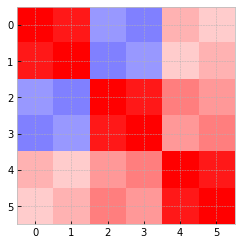

In [5]:
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)

In [6]:
bct.degrees_und(SampleData)

array([6., 6., 6., 6., 6., 6.])

## Why do all of the nodes have the same degree? What does this mean when considering neuroimaging data and not sample data?

Degree is often a good measure of determining what nodes within a graph are a provincial hub, or a node important to communication within a functional network.

# Degree Exercises

## 1.) What degree do we expect node 1 to have in the following graph?

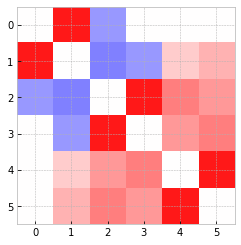

In [7]:
SampleData = np.array([[0,.9,-.4,0,0,0],\
              [.9,0,-.5,-.4,.2,.3],\
              [-.4,-.5,0,.9,.5,.4],\
              [0,-.4,.9,0,.4,.5],\
              [0,.2,.4,.5,0,.9],\
              [0,.3,.5,.4,.9,0]])
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)

## 2.) Edit the array such that node 2 and 5 both have a degree of 3.

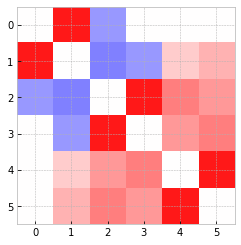

In [8]:
SampleData = np.array([[0,.9,-.4,0,0,0],\
              [.9,0,-.5,-.4,.2,.3],\
              [-.4,-.5,0,.9,.5,.4],\
              [0,-.4,.9,0,.4,.5],\
              [0,.2,.4,.5,0,.9],\
              [0,.3,.5,.4,.9,0]])
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)



# Participation Coefficient
Unfortunatly, degree helps us little in regard to determining which nodes are important to communication between functional networks. For between network communication a measure called participation coefficient. Participation coefficient is very similar to degree in that it too measures the numver of connections to a node, but unlike degree, participation coefficient measures the number of different functional networks a node connects to.

<div>
<img src='Images/ColoredNet.png' width='300'/>
<div/>

What is the participation coefficient of the blue node in the figures below if each color represents a different network?

<div>
<img src='Images/ParCoef4.png' width='300'/>
<div/>
<div>
<img src='Images/ParCoef4B.png' width='300'/>
<div/>

In [9]:
NetIdent = [1,1,2,2,3,3]
SampleData = np.array([[1,.9,-.4,-.5,.3,.2],\
              [.9,1,-.5,-.4,.2,.3],\
              [-.4,-.5,1,.9,.5,.4],\
              [-.5,-.4,.9,1,.4,.5],\
              [.3,.2,.4,.5,1,.9],\
              [.2,.3,.5,.4,.9,1]])

[-1.07555556 -1.07555556 -0.44875346 -0.44875346  0.57116621  0.57116621]


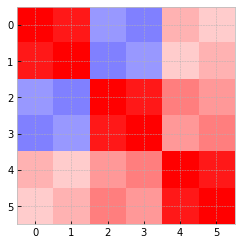

In [10]:
print(bct.participation_coef(SampleData, NetIdent, degree='undirected'))
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)

[-2.88       -6.48       -2.          0.09183673  0.585       0.6122449 ]


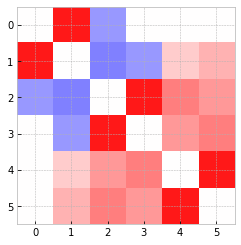

In [11]:
NetIdent = [1,1,2,2,3,3]
SampleData = np.array([[0,.9,-.4,0,0,0],\
              [.9,0,-.5,-.4,.2,.3],\
              [-.4,-.5,0,.9,.5,.4],\
              [0,-.4,.9,0,.4,.5],\
              [0,.2,.4,.5,0,.9],\
              [0,.3,.5,.4,.9,0]])
print(bct.participation_coef(SampleData, NetIdent, degree='undirected'))
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)

[0.5   0.64  0.64  0.625 0.625 0.625]


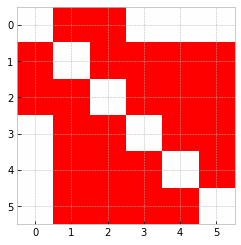

In [12]:
NetIdent = [1,1,2,2,3,3]
SampleData = np.array([[0,1,1,0,0,0],\
              [1,0,1,1,1,1],\
              [1,1,0,1,1,1],\
              [0,1,1,0,1,1],\
              [0,1,1,1,0,1],\
              [0,1,1,1,1,0]])
print(bct.participation_coef(SampleData, NetIdent, degree='undirected'))
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)

# Participation Coef Exercises

## 1.) What do you think the effect of removing connections between node 1 and 5 will have?

[0.5        0.625      0.64       0.625      0.625      0.44444444]


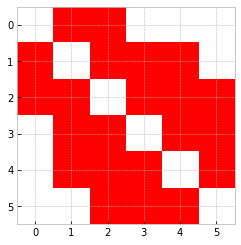

In [13]:
NetIdent = [1,1,2,2,3,3]
SampleData = np.array([[0,1,1,0,0,0],\
              [1,0,1,1,1,0],\
              [1,1,0,1,1,1],\
              [0,1,1,0,1,1],\
              [0,1,1,1,0,1],\
              [0,0,1,1,1,0]])
print(bct.participation_coef(SampleData, NetIdent, degree='undirected'))
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)

## 2.) Change the NetIdent array to explore how different community structures change participation coefficeint as well!

[0.5        0.625      0.64       0.625      0.625      0.44444444]


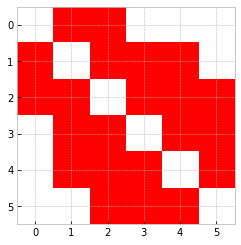

In [14]:
NetIdent = [1,1,2,2,3,3]
SampleData = np.array([[0,1,1,0,0,0],\
              [1,0,1,1,1,0],\
              [1,1,0,1,1,1],\
              [0,1,1,0,1,1],\
              [0,1,1,1,0,1],\
              [0,0,1,1,1,0]])
print(bct.participation_coef(SampleData, NetIdent, degree='undirected'))
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)

# Modularity

There is one more commonly applied metric called modularity. Unlike degree and participation coefficient, modularity does not generate a score for an individual node and instead is a singular measure representing a whole network. Modularity is best described as measureing the level of segregation between functional networks. Networks with high levels of within network connectivity and low between network connecvitiy will have greater modularity scores. Greater modularity scores at rest are associated with higher scores on cognitive tests. 

Rank the three following figures from least to greatest modularity score.

## A
<div>
<img src='Images/ModDown.png' width='250'/>
<div/>
    
## B
<div>
<img src='Images/ParCoef4B.png' width='250'/>
<div/>
    
## C
<div>
<img src='Images/ParCoef4.png' width='250'/>
<div/>

## Why Connectomics?

Connectomics allows us to go beyond overlaying clusters and begin to obeserve the brain as a set of distinct but related units. In this way we can go beyond the required large scale analysis of fMRI results to reach conclusions and better represent our outcomes.

<div>
<img src='Images/Parcel.png' width='400'/>
<div/>

In [15]:
NetIdent = [1,1,2,2,3,3]
SampleData = [[1,.9,.4,.5,.3,.2],\
              [.9,1,.5,.4,.2,.3],\
              [.4,.5,1,.9,.5,.4],\
              [.5,.4,.9,1,.4,.5],\
              [.3,.2,.4,.5,1,.9],\
              [.2,.3,.5,.4,.9,1]]

([1, 1, 2, 2, 3, 3], 0.2190592892826846)


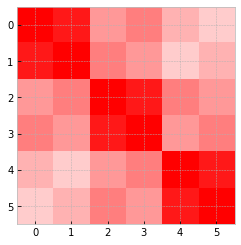

In [16]:
print(bct.modularity_und(SampleData, kci=NetIdent))
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)

([1, 1, 2, 2, 3, 3], 0.6666666666666667)


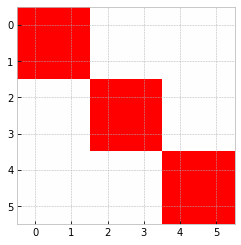

In [17]:
NetIdent = [1,1,2,2,3,3]
SampleData = [[1,1,0,0,0,0],\
              [1,1,0,0,0,0],\
              [0,0,1,1,0,0],\
              [0,0,1,1,0,0],\
              [0,0,0,0,1,1],\
              [0,0,0,0,1,1]]
print(bct.modularity_und(SampleData, kci=NetIdent))
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)

# Modularity Exercises

## 1.) Set node 0's and node 1's connections to eachoter to zero. How does this change modularity?

([1, 1, 2, 2, 3, 3], 0.6666666666666667)


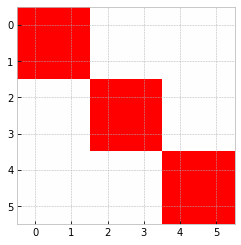

In [18]:
NetIdent = [1,1,2,2,3,3]
SampleData = [[1,1,0,0,0,0],\
              [1,1,0,0,0,0],\
              [0,0,1,1,0,0],\
              [0,0,1,1,0,0],\
              [0,0,0,0,1,1],\
              [0,0,0,0,1,1]]
print(bct.modularity_und(SampleData, kci=NetIdent))
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)

## 2.) Change the NetIdent array to explore how different community structures change modularity!

([1, 1, 2, 2, 3, 3], 0.6666666666666667)


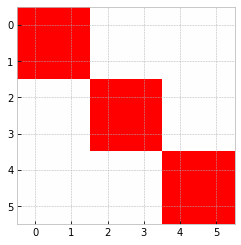

In [19]:
NetIdent = [1,1,2,2,3,3]
SampleData = [[1,1,0,0,0,0],\
              [1,1,0,0,0,0],\
              [0,0,1,1,0,0],\
              [0,0,1,1,0,0],\
              [0,0,0,0,1,1],\
              [0,0,0,0,1,1]]
print(bct.modularity_und(SampleData, kci=NetIdent))
plt.style.use('bmh')
plt.imshow(SampleData, cmap='bwr', interpolation='nearest', vmin = -1, vmax = 1)